# Linear Regression Predictor – Housing Prices

### Project Description:
This project demonstrates the implementation of a linear regression model with L2 regularization (Ridge Regression) to predict housing sale prices using a dataset sourced from Kaggle. The workflow includes data exploration, preprocessing, model training from scratch, evaluation through performance metrics like RMSE and R², and comparison with a baseline predictor. Visualization techniques are used to understand the distribution of sale prices and assess model performance.

### Objectives:
* Load and explore a real-world housing dataset from Kaggle
* Select, inspect, and preprocess relevant features for regression analysis
* Implement a custom Ridge Regression training loop, including feature standardization and loss computation
* Evaluate model performance using test set loss, RMSE, and R² score
* Visualize the distribution of sale prices and model predictions
* Benchmark model performance against a simple baseline predictor (mean sale price)


### Public dataset source:
[Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)
The data contains information from the 1990 California census.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import r2_score

In [2]:
# Establish file path and import data
path = 'CA_housing.csv'
df = pd.read_csv(path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [16]:
# Choose features
cols=['LotArea','OverallQual','OverallCond','YearBuilt','TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd','PoolArea']
print(df[cols].isnull().sum())
print(df['SalePrice'].isnull().sum())

LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
PoolArea        0
dtype: int64
0


In [17]:
# Feature data types
for item in cols:
  print(f"Item: {item}, Type: {type(item)}")

Item: LotArea, Type: <class 'str'>
Item: OverallQual, Type: <class 'str'>
Item: OverallCond, Type: <class 'str'>
Item: YearBuilt, Type: <class 'str'>
Item: TotalBsmtSF, Type: <class 'str'>
Item: 1stFlrSF, Type: <class 'str'>
Item: 2ndFlrSF, Type: <class 'str'>
Item: FullBath, Type: <class 'str'>
Item: BedroomAbvGr, Type: <class 'str'>
Item: TotRmsAbvGrd, Type: <class 'str'>
Item: PoolArea, Type: <class 'str'>


In [18]:
# Convert the strings to floats
df_float = df[cols].astype(float)
print(df_float.dtypes)

LotArea         float64
OverallQual     float64
OverallCond     float64
YearBuilt       float64
TotalBsmtSF     float64
1stFlrSF        float64
2ndFlrSF        float64
FullBath        float64
BedroomAbvGr    float64
TotRmsAbvGrd    float64
PoolArea        float64
dtype: object


In [20]:
# Create a function to split the dataset into train and test
def TrainTestSplit(df, feature_cols, target_col, test_size=0.2, seed=None):
    X = df[feature_cols].values
    y = df[target_col].values

    np.random.seed(seed)
    n = len(X)
    indices = np.random.permutation(n)

    test_size = int(n * test_size)
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

In [21]:
# L2 Regularization Linear Regression function
def model_train_L2(X, y, alpha, n_iterations, reg_lambda, standardize=True):
    # standardize features
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)

    # initialize values
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    loss_history = []

    for i in range(n_iterations):
        # calculate prediction with weights
        y_hat = np.dot(X, w) + b
        # error
        resid = y_hat - y

        # gradient with L2 regularization
        grad_w = (2 / n_samples) * np.dot(X.T, resid) + 2 * reg_lambda * w
        grad_b = (2/n_samples) * np.sum(resid)

        # update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # compute loss with regularization
        mse = np.mean(resid ** 2)
        reg_term = reg_lambda * np.sum(w ** 2)
        loss = mse + reg_term
        loss_history.append(loss)

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")
    return mse, loss_history, w, b

In [22]:
# Functions for predict and evaluating utilizing the model
def model_predict(X, w, b, standardize=True, X_mean=None, X_std=None):
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    return np.dot(X, w) + b

def model_evaluate(y_pred, y_test, w, b, reg_lambda):
    error = y_pred - y_test
    mse = np.mean(error ** 2)
    reg_term = reg_lambda * np.sum(w ** 2)
    loss = mse + reg_term
    return loss

In [23]:
X_train, X_test, y_train, y_test = TrainTestSplit(df, cols, target_col='SalePrice')
mse, loss_history, w, b = model_train_L2(X_train, y_train, alpha=0.01, n_iterations=1000, reg_lambda=0.1, standardize=True)

Iteration 0: Loss = 39485632301.0421
Iteration 100: Loss = 2315305632.6649
Iteration 200: Loss = 1717553954.7636
Iteration 300: Loss = 1703534185.6004
Iteration 400: Loss = 1702262391.1271
Iteration 500: Loss = 1701856546.3273
Iteration 600: Loss = 1701690472.7704
Iteration 700: Loss = 1701618715.3809
Iteration 800: Loss = 1701586921.7477
Iteration 900: Loss = 1701572589.4160


In [24]:
# Make predictions on test set with predicted weights
y_pred = model_predict(X_test, w, b, standardize=True)

# Evaluate
test_loss = model_evaluate(y_pred, y_test, w, b, reg_lambda=0.1)
print("Test Loss:", test_loss)

Test Loss: 1240350582.1497772


This means that the MSE was about 1.28 billion USD or 1.28e9. Therefore, the RMSE is 3573, meaning the model's predictions of housing price are off by about USD 35,739 on average.

In [27]:
# To contextualize the MSE, look at the average sale price and the standard deviation of the target variable for better interpretation
mean_Sale_Price = df['SalePrice'].mean()
print(f"Mean Sale Price: ${mean_Sale_Price:,.2f}")

std_Sale_Price = df['SalePrice'].std()
print(f"Standard Deviation of Sale Price: ${std_Sale_Price:,.2f}")

RMSE_mean_ratio = np.sqrt(test_loss) / mean_Sale_Price * 100
print(f"RMSE / Mean Sale Price: {RMSE_mean_ratio:.0f}%")

RMSE_std_ratio = np.sqrt(test_loss) / std_Sale_Price * 100
print(f"RMSE / Standard Deviation of Sale Price: {RMSE_std_ratio:.0f}%")

# The scale of the RMSE compared to the mean sale price is small, which is a good sign

Mean Sale Price: $180,921.20
Standard Deviation of Sale Price: $79,442.50
RMSE / Mean Sale Price: 19%
RMSE / Standard Deviation of Sale Price: 44%


In [28]:
# Compare to baseline model
baseline_pred = np.full_like(y_test, y_train.mean())

baseline_rmse = np.sqrt(np.mean((y_test - baseline_pred) ** 2))
print(f"Baseline RMSE: ${baseline_rmse:,.2f}")
rmse = np.sqrt(test_loss)
print(f"Model RMSE: ${rmse:,.2f}")
improvement = (baseline_rmse - rmse) / baseline_rmse * 100
print(f"Improvement: ${baseline_rmse - rmse:,.2f}")
print(f"Improvement: {improvement:.0f}%")

Baseline RMSE: $71,592.32
Model RMSE: $35,218.61
Improvement: $36,373.71
Improvement: 51%


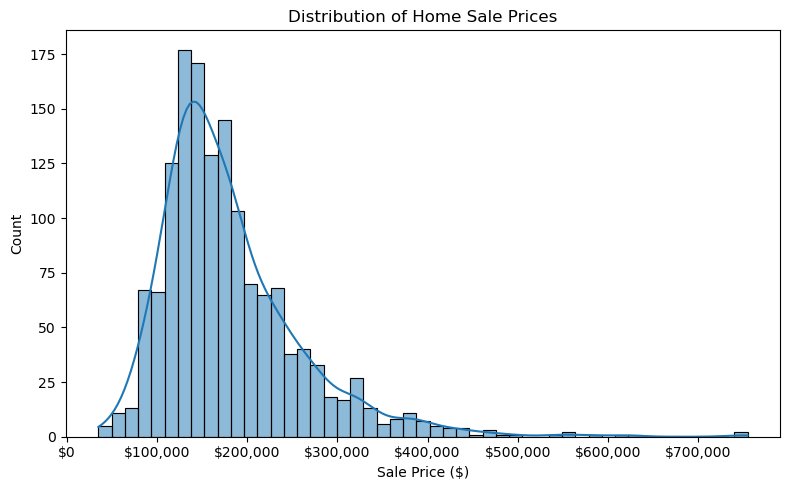

In [32]:
# Take a look at distribution of home sale prices
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True)

formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title("Distribution of Home Sale Prices")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
# To better understand the R score to see evaluate model performance
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
# Pretty good!
# "Strong" fit
# The model explains ~82.7% of the variance in housing sale prices

R² Score: 0.7970
